<a href="https://colab.research.google.com/github/maaxfuentes00/datos/blob/main/CentroGravedad_OSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gestión Estratégica de Operaciones**
Unidad: Localización de las Instalaciones

Tema: Centro de gravedad

Caso: Distribución de productos de panadería a colegios de Valdivia

In [ ]:
import pandas as pd
coordenadas = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/CentroGravedad.xlsx")
viajes = coordenadas['Viajes']
latitudes = coordenadas['Latitud']
longitudes = coordenadas['Longitud']
print(coordenadas)

                       NombreColegio    Latitud   Longitud  Viajes
0  Instituto Alemán Carlos Anwandter -39.811837 -73.252875      15
1             Colegio Windsor School -39.833163 -73.240853      10
2       Instituto Salesiano Valdivia -39.815175 -73.236604       6
3          Colegio María Auxiliadora -39.816965 -73.233243      12
4    Instituto Inmaculada Concepción -39.817957 -73.245535       8


In [ ]:
lat_opt = (viajes*latitudes).sum() / viajes.sum()
long_opt = (viajes*longitudes).sum() / viajes.sum()
print ("Las coordenadas del centro de gravedad son: ", lat_opt, long_opt)

Las coordenadas del centro de gravedad son:  -39.81857799806893 -73.24283288733108


In [ ]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 3.2 MB/s eta 0:00:00


In [ ]:
# !pip install osmnx
import osmnx as ox
ciudad = "Valdivia, Chile"
mapa = ox.graph_from_place(ciudad, network_type='drive')
ox.save_graphml(mapa, filepath=str(ciudad)+".graphml") # Para guardar el mapa en un archivo .graphml

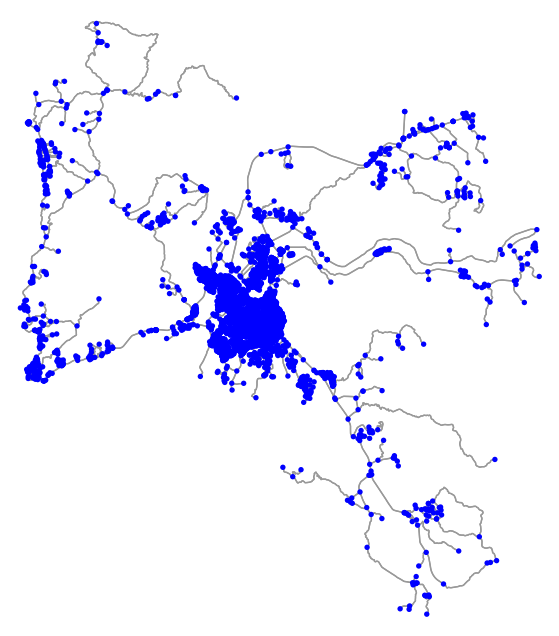

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
mapa = ox.load_graphml(str("Valdivia, Chile")+".graphml")
ox.plot_graph(ox.project_graph(mapa),bgcolor="white",node_color="blue")

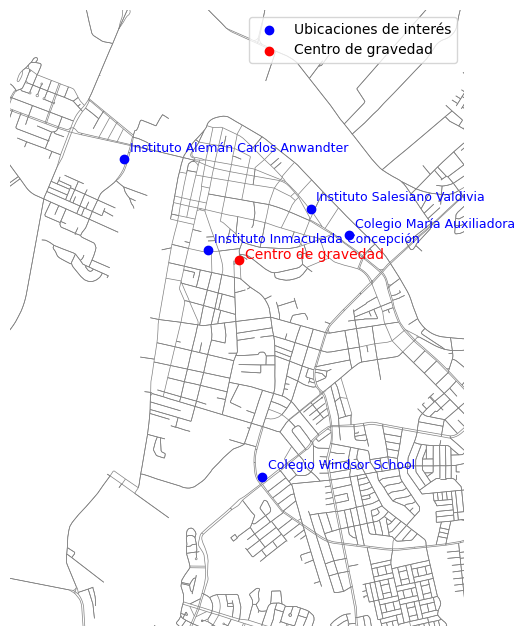

In [ ]:
import matplotlib.pyplot as plt

# Determinar límites del mapa
margen = 0.01
min_lat = latitudes.min() - margen
max_lat = latitudes.max() + margen
min_long = longitudes.min() - margen
max_long = longitudes.max() + margen

# Crear gráfico
fig, ax = ox.plot_graph(mapa, node_size=0, edge_color='gray', edge_linewidth=0.5, bgcolor='white', show=False, close=False)
ax.scatter(longitudes, latitudes, color='blue', label='Ubicaciones de interés', zorder=3)
ax.set_xlim(min_long, max_long)
ax.set_ylim(min_lat, max_lat)

# Textos
for i, nombre in enumerate(coordenadas['NombreColegio']):
    ax.text(longitudes[i] + 0.0005, latitudes[i] + 0.0005, f"{nombre}", fontsize=9, color='blue', zorder=4)

# Centro de gravedad
ax.scatter(long_opt, lat_opt, color='red', label='Centro de gravedad', zorder=4)
ax.text(long_opt + 0.0005, lat_opt + 0.00005, "Centro de gravedad", fontsize=10, color='red', zorder=4)

# Leyenda
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.legend()
plt.show()